# Problem Statement:

The aim of this project was to develop a predictive model to estimate the total compensation of employees based on various factors such as job role, years of experience, and other relevant variables. The challenge involved handling a dataset with outliers, performing data preprocessing, and implementing a multiple linear regression model to accurately predict compensation.

# import libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data preparation

In [2]:
#data reading
df=pd.read_csv('employee_compensation.csv')
df.head()

,Year_Type,Year,Employee_Identifier,Salaries,Overtime,Other_Salaries,Total_Salary,Retirement,Health/Dental,Other_Benefits,Total_Benefits,Total_Compensation
0,Fiscal,2015,42853,92288.22,267.45,267.45,92823.12,20700.20,12500.56,7605.75,40806.51,133629.63
1,Calendar,2015,28248,1466.38,348.23,0.00,1814.61,0.00,442.03,141.59,583.62,2398.23
2,Fiscal,2014,30651,76536.95,13583.72,10855.94,100976.61,18632.19,12464.61,8011.41,39108.21,140084.82
3,Fiscal,2014,19473,45659.88,0.00,1625.37,47285.25,10081.20,0.00,3936.63,14017.83,61303.08
4,Fiscal,2013,7176,41832.00,0.00,0.00,41832.00,7617.60,5908.52,3254.50,16780.62,58612.62


In [3]:
#check the shape of the data
df.shape

(50000, 12)

In [4]:
#check the information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Type            50000 non-null  object 
 1   Year                 50000 non-null  int64  
 2   Employee_Identifier  50000 non-null  int64  
 3   Salaries             50000 non-null  float64
 4   Overtime             50000 non-null  float64
 5   Other_Salaries       50000 non-null  float64
 6   Total_Salary         50000 non-null  float64
 7   Retirement           50000 non-null  float64
 8   Health/Dental        50000 non-null  float64
 9   Other_Benefits       50000 non-null  float64
 10  Total_Benefits       50000 non-null  float64
 11  Total_Compensation   50000 non-null  float64
dtypes: float64(9), int64(2), object(1)
memory usage: 4.6+ MB


In the above dataset variable 'year' wrongly metioned as intiger, but according to problem statement it's a object type   

In [5]:
#change data type
df['Year']=df['Year'].astype(object)

In [7]:
df.dtypes

Year_Type               object
Year                    object
Employee_Identifier      int64
Salaries               float64
Overtime               float64
Other_Salaries         float64
Total_Salary           float64
Retirement             float64
Health/Dental          float64
Other_Benefits         float64
Total_Benefits         float64
Total_Compensation     float64
dtype: object

Now we are removing insignificant column, here Employee_Identifier is just an employ id that is useless for further analysis

In [6]:
#droping column
df=df.drop('Employee_Identifier',axis=1)

In [7]:
df.shape

(50000, 11)

# outlier treatment

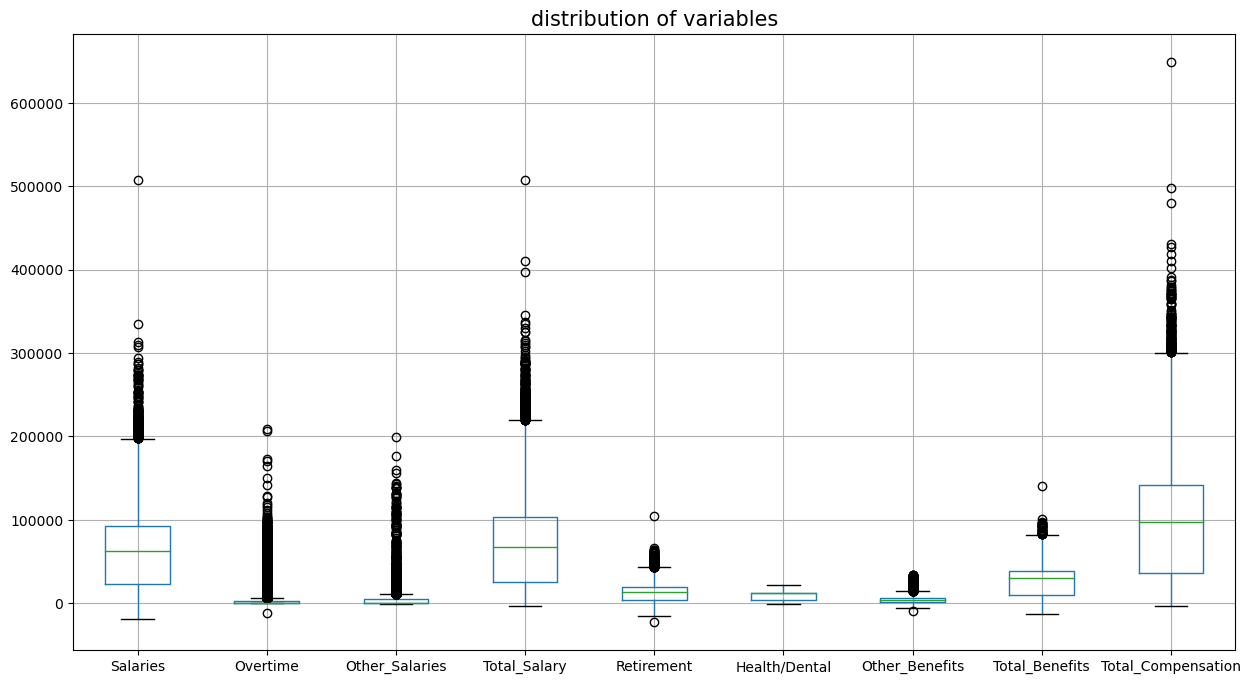

In [8]:
#checking for outliers
plt.figure(figsize=(15,8))
df.boxplot()
plt.title('distribution of variables',fontsize=15)
#plt.xticks(rotation='vertical')
plt.show()

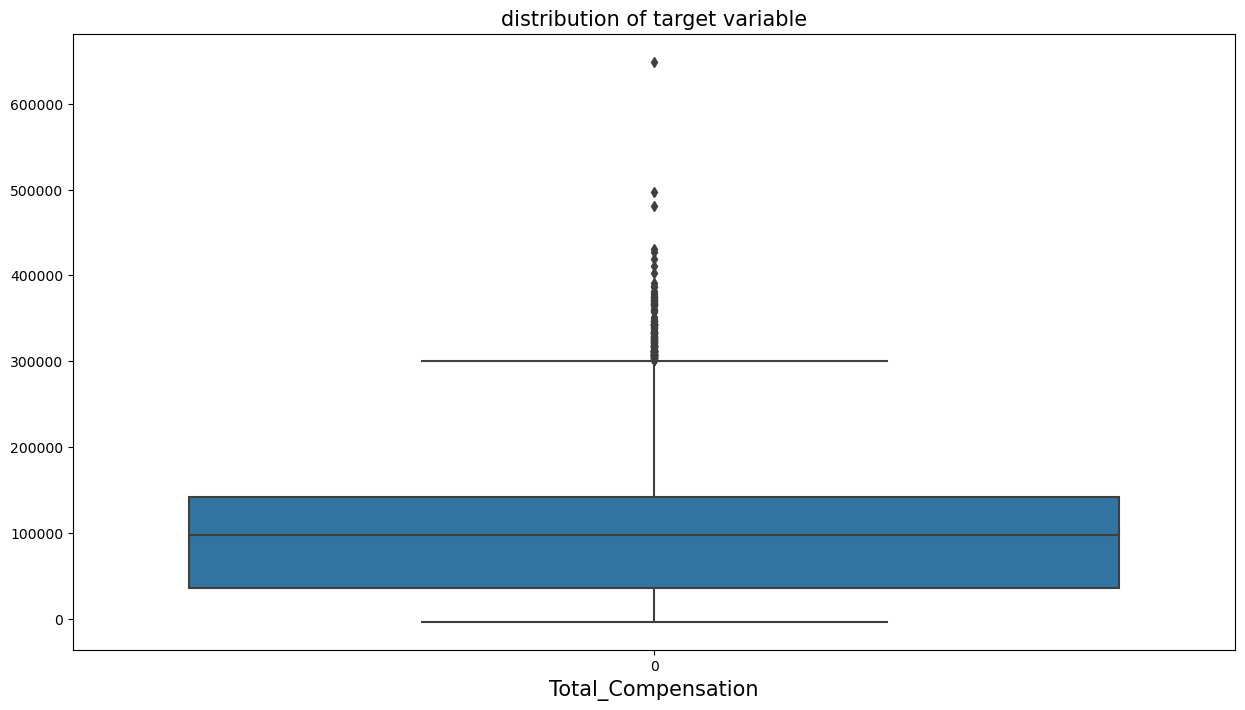

In [9]:
#boxplot on only dependent variable
plt.figure(figsize=(15,8))
sns.boxplot(df['Total_Compensation'])
plt.title('distribution of target variable',fontsize=15)
plt.xlabel('Total_Compensation',fontsize=15)
plt.show()

In above plots we can see that data has large amount of outliers, those outliers are not good for further analysis so we should remove that 

In [10]:
#getting IQR
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
df=df[~((df< (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

C:\Users\91886\AppData\Local\Temp\ipykernel_10912\3083368038.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1=df.quantile(0.25)
C:\Users\91886\AppData\Local\Temp\ipykernel_10912\3083368038.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3=df.quantile(0.75)
C:\Users\91886\AppData\Local\Temp\ipykernel_10912\3083368038.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df=df[~((df< (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


(37721, 11)

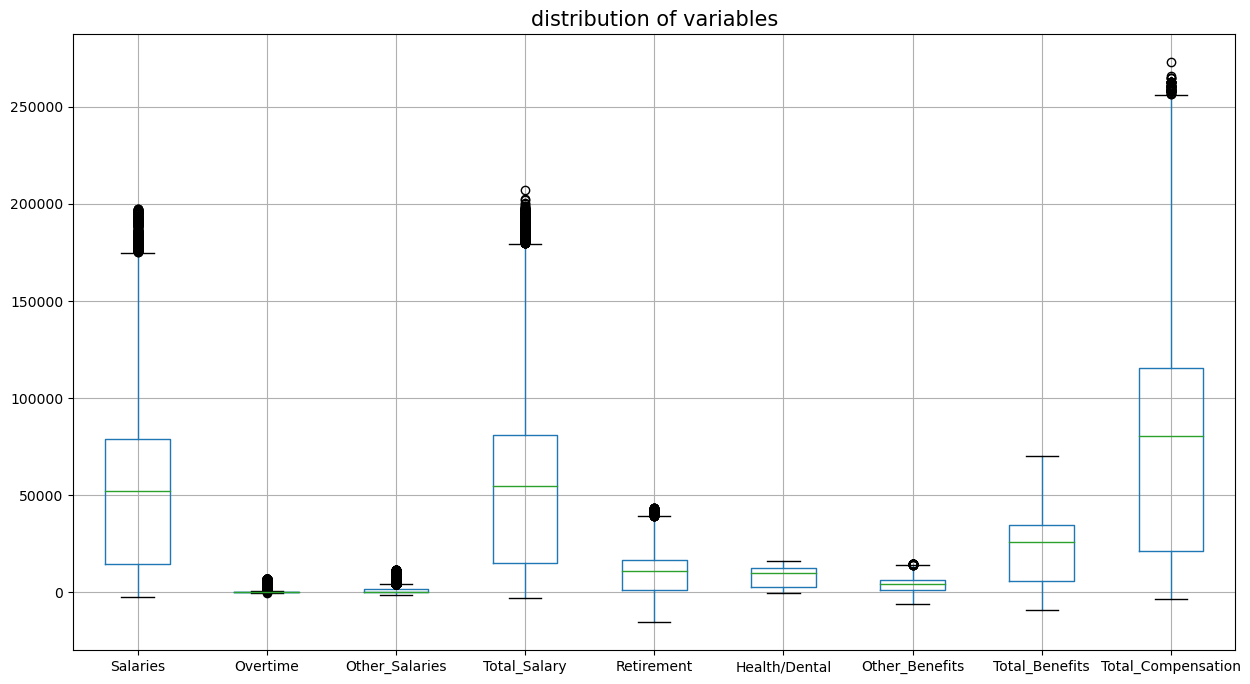

In [11]:
#after removing the outliers
plt.figure(figsize=(15,8))
df.boxplot()
plt.title('distribution of variables',fontsize=15)
#plt.xticks(rotation='vertical')
plt.show()

# Missing value treatment

In [12]:
#checking for null values
df.isnull().sum()

Year_Type             0
Year                  0
Salaries              0
Overtime              0
Other_Salaries        0
Total_Salary          0
Retirement            0
Health/Dental         0
Other_Benefits        0
Total_Benefits        0
Total_Compensation    0
dtype: int64

there is no missing value here

# data scaling

In [14]:
df.head()

,Year_Type,Year,Salaries,Overtime,Other_Salaries,Total_Salary,Retirement,Health/Dental,Other_Benefits,Total_Benefits,Total_Compensation
0,Fiscal,2015,92288.22,267.45,267.45,92823.12,20700.20,12500.56,7605.75,40806.51,133629.63
1,Calendar,2015,1466.38,348.23,0.00,1814.61,0.00,442.03,141.59,583.62,2398.23
3,Fiscal,2014,45659.88,0.00,1625.37,47285.25,10081.20,0.00,3936.63,14017.83,61303.08
4,Fiscal,2013,41832.00,0.00,0.00,41832.00,7617.60,5908.52,3254.50,16780.62,58612.62
5,Calendar,2013,74132.00,0.00,1443.42,75575.42,14851.23,12888.34,6233.85,33973.42,109548.84


In [15]:
#data scaling
df.iloc[:, 2:11] = df.iloc[:, 2:11].apply(lambda rec: (rec - rec.mean()) / rec.std())
df.head()

,Year_Type,Year,Salaries,Overtime,Other_Salaries,Total_Salary,Retirement,Health/Dental,Other_Benefits,Total_Benefits,Total_Compensation
0,Fiscal,2015,0.983488,-0.228091,-0.474919,0.926912,1.178494,0.916565,1.145315,1.160922,1.001727
1,Calendar,2015,-1.252266,-0.167552,-0.587276,-1.263215,-1.180529,-1.491462,-1.259970,-1.365191,-1.304472
3,Fiscal,2014,-0.164358,-0.428525,0.095551,-0.168961,-0.031662,-1.579733,-0.037039,-0.521484,-0.269306
4,Fiscal,2013,-0.258589,-0.428525,-0.587276,-0.300194,-0.312417,-0.399832,-0.256852,-0.347973,-0.316586
5,Calendar,2013,0.536538,-0.428525,0.019113,0.511845,0.511937,0.994002,0.703228,0.731784,0.578543


In [16]:
#getting dependent and independent data
x=df.drop('Total_Compensation',axis=1)
y=df['Total_Compensation']

# check the correlation

C:\Users\91886\AppData\Local\Temp\ipykernel_10912\2670384520.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(x.corr(),annot=True, annot_kws = {"size": 11})


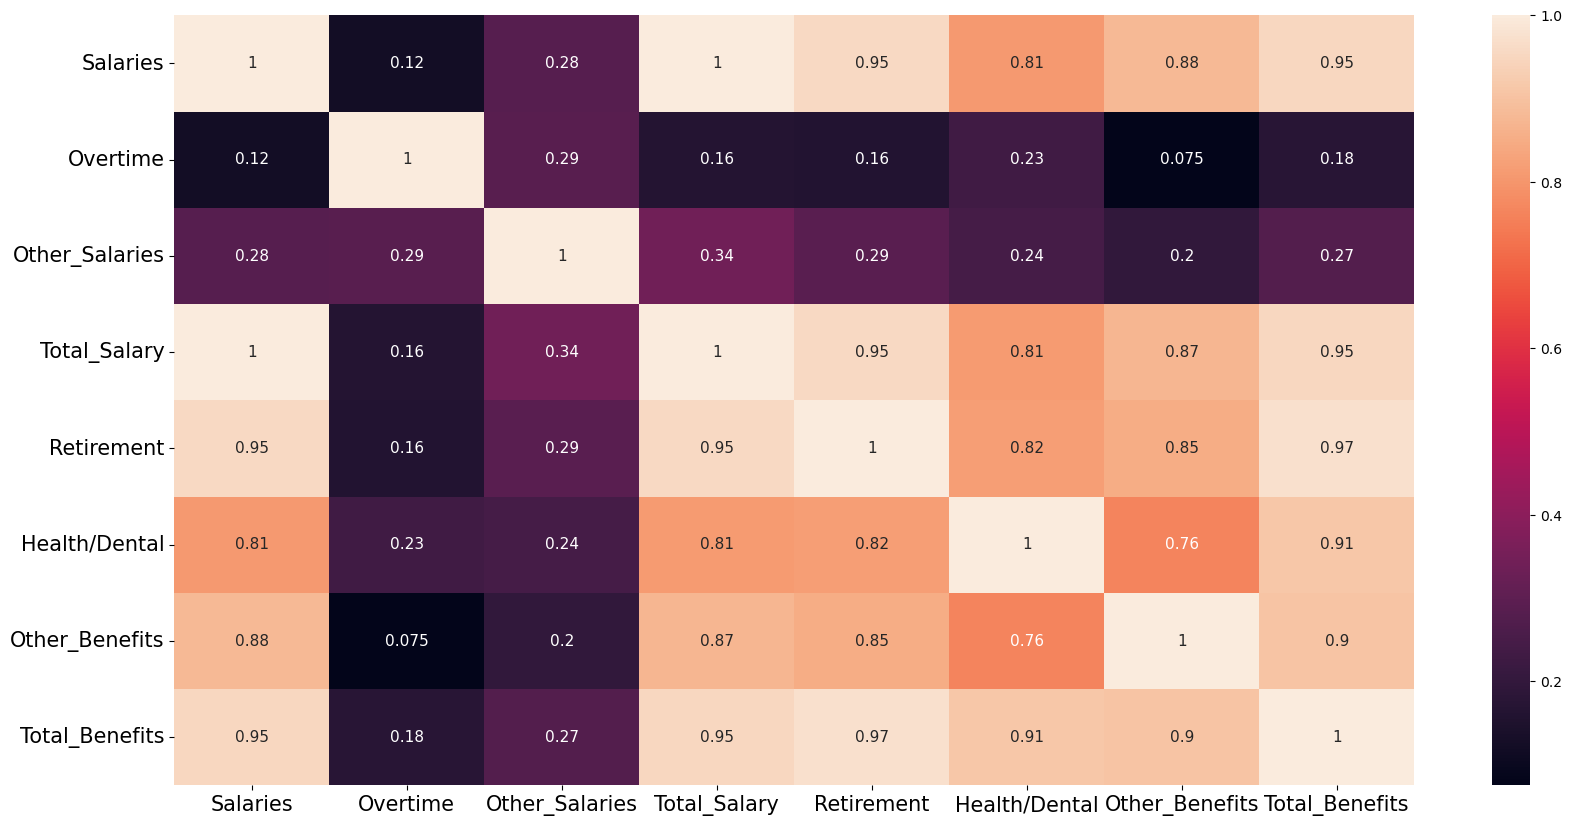

In [17]:
#plotting correlation matrix
plt.figure(figsize=(20,10))
sns.heatmap(x.corr(),annot=True, annot_kws = {"size": 11})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

identify the variables with value greater than 0.6

C:\Users\91886\AppData\Local\Temp\ipykernel_10912\2351879056.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(x.corr()[np.abs(x.corr()) > 0.6], annot = True, annot_kws = {"size": 11})


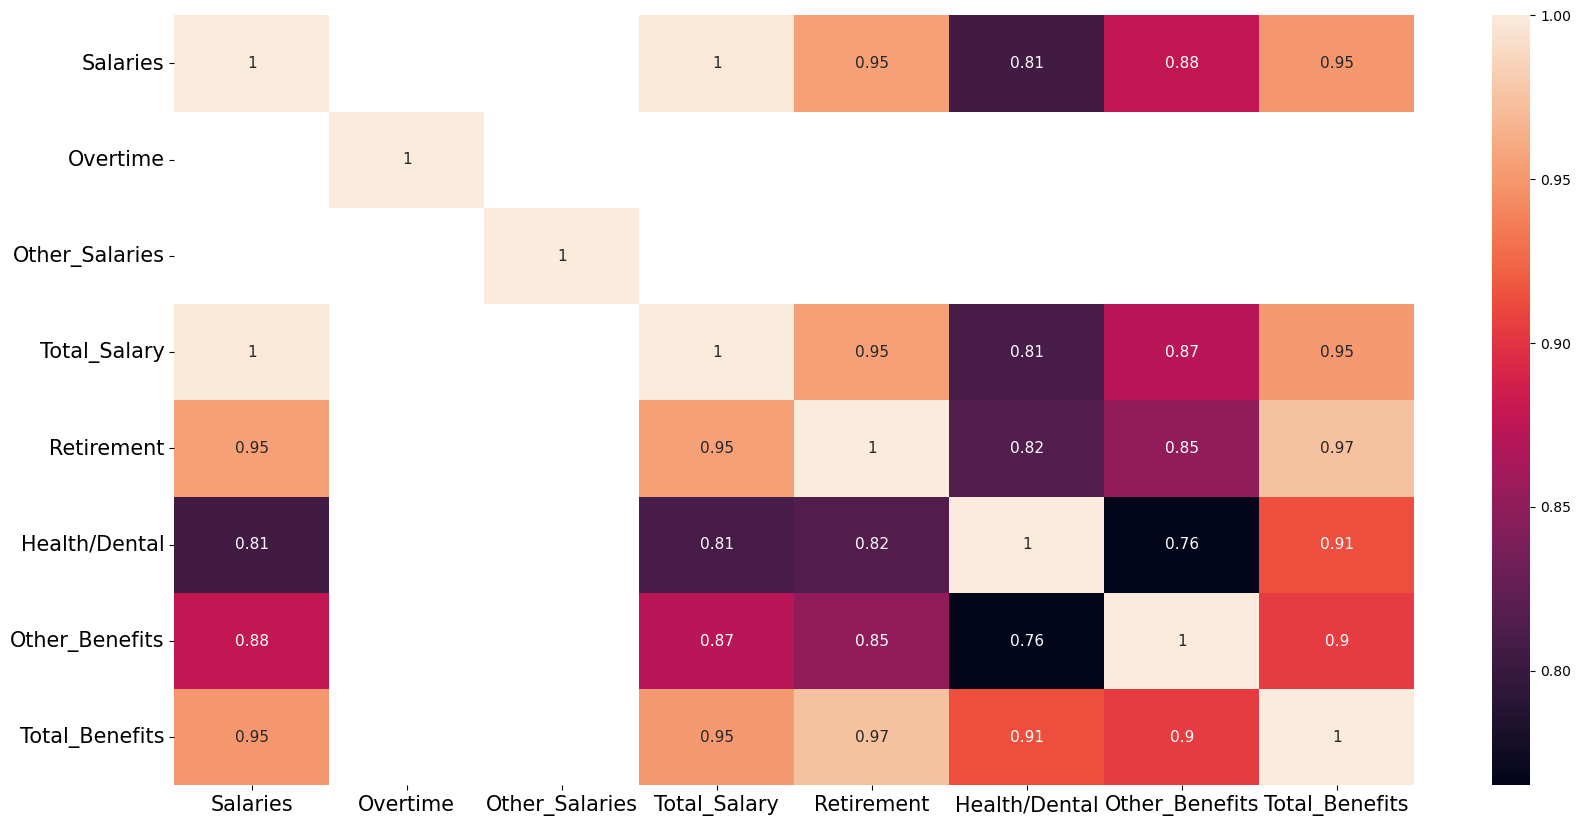

In [18]:
plt.figure(figsize=(20,10))
sns.heatmap(x.corr()[np.abs(x.corr()) > 0.6], annot = True, annot_kws = {"size": 11})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

# build the MLR model

In [19]:
#spliting numeric and categorical data
x_num=x.select_dtypes(include=[np.number])
x_cat=x.select_dtypes(include=[np.object])

C:\Users\91886\AppData\Local\Temp\ipykernel_10912\1611797477.py:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x_cat=x.select_dtypes(include=[np.object])


In [20]:
#categorical data treatment
dummy=pd.get_dummies(x_cat,drop_first=True)
encodedx=pd.concat([x_num,dummy],axis=1)

C:\Users\91886\AppData\Local\Temp\ipykernel_10912\2647035349.py:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  dummy=pd.get_dummies(x_cat,drop_first=True)


In [21]:
#data spliting
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(encodedx,y,random_state=1,test_size=0.3)

In [22]:
x_train.shape

(26404, 12)

In [23]:
#model fitting
import statsmodels.api as sm
fullmodel=sm.OLS(y_train,x_train).fit()
fullmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     Total_Compensation   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          4.025e+33
Date:                Fri, 28 Jun 2024   Prob (F-statistic):                        0.00
Time:                        21:42:11   Log-Likelihood:                      8.8018e+05
No. Observations:               26404   AIC:                                 -1.760e+06
Df Residuals:                   26394   BIC:                                 -1.760e+06
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Salaries             0.3642    9.5e-18   3.84e+16      0.000       0.364       0.364
Overtime             0.0120   5.35e-18   2.24e+15      0.000       0.012       0.012
Other_Salaries       0.0213   5.46e-18   3.91e+15      0.000       0.021       0.021
Total_Salary         0.3577   9.24e-18   3.87e+16      0.000       0.358       0.358
Retirement           0.1070   1.43e-17    7.5e+15      0.000       0.107       0.107
Health/Dental        0.0611   9.29e-18   6.57e+15      0.000       0.061       0.061
Other_Benefits       0.0379   1.06e-17   3.58e+15      0.000       0.038       0.038
Total_Benefits       0.0856   6.54e-18   1.31e+16      0.000       0.086       0.086
Year_Type_Fiscal   3.66e-16   9.41e-18     38.916      0.000    3.48e-16    3.84e-16
Year_2014         -3.99e-17   1.05e-17     -3.795      0.000   -6.05e-17   -1.93e-17
Year_2015         3.946e-17   1.05e-17      3.746      0.000    1.88e-17    6.01e-17
Year_2016        -2.151e-16   1.59e-17    -13.506      0.000   -2.46e-16   -1.84e-16
==============================================================================
Omnibus:                      713.873   Durbin-Watson:                   1.705
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              542.956
Skew:                          -0.262   Prob(JB):                    1.25e-118
Kurtosis:                       2.532   Cond. No.                     1.27e+16
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 9.17e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Solution Description:

To address the problem, the following steps were undertaken:

Data Cleaning: The dataset was preprocessed to correct data types and remove insignificant columns, such as employee IDs.
Outlier Treatment: Significant outliers were identified and removed using the Interquartile Range (IQR) method, improving the quality of the data for analysis.
Feature Scaling: The features were scaled to standardize the data, ensuring that all variables contributed equally to the model.
Correlation Analysis: A correlation matrix was generated to understand the relationships between independent variables and to avoid multicollinearity.
Model Building: A multiple linear regression model was built using the cleaned and preprocessed data. The model was then trained and tested to predict employee compensation.